### Find All Anagrams in a String
---
Given two strings s and p, return an array of all the start indices of p's anagrams in s. You may return the answer in any order.

An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

|Input|Output|Explanation|
|:--|:--|:--|
|s = "cbaebabacd", p = "abc"|[0,6]|The substring with start index = 0 is "cba", which is an anagram of "abc". The substring with start index = 6 is "bac", which is an anagram of "abc".|
|s = "abab", p = "ab"|[0,1,2]|The substring with start index = 0 is "ab", which is an anagram of "ab". The substring with start index = 1 is "ba", which is an anagram of "ab". The substring with start index = 2 is "ab", which is an anagram of "ab".|
>$Constraints:$  
>- $1 <= s.length, p.length <= 3 * 10^4$
>- $s$ $and$ $p$ $consist$ $of$ $lowercase$ $English$ $letters.$

In [1]:
import java.util.regex.Pattern;
import java.time.Duration;
import java.time.Instant;
import java.util.stream.*;
import java.util.function.*;

class Solution {
    public List<Integer> findAnagrams(String s, String p) {
        if(p.length() > s.length()) return new ArrayList<>();
        
        Map<String, Long> sMap = mapStrCount(s.substring(0, p.length()))
            , pMap = mapStrCount(p);
        
        return IntStream.range(0, s.length() - p.length() + 1)
            .filter(i -> pMap.equals(getNextStrMap(sMap, s, i, p.length())))
            .boxed()
            .collect(Collectors.toList());
    }

    private Map<String, Long> mapStrCount(String s) {
        return Pattern.compile("").splitAsStream(s)
                .collect(Collectors.groupingBy(
                    Function.identity(), Collectors.counting())
                );
    }

    private Map<String, Long> getNextStrMap(Map<String, Long> sMap, String s, int i, int pLength) {
        if (i == 0) return sMap;
        String leftKey = s.charAt(i-1) + "";
        String rightKey = s.charAt(i + pLength-1) + "";

        if(sMap.get(leftKey) == Long.valueOf(1)) {
            sMap.remove(leftKey);
        } else {
            sMap.put(leftKey, sMap.get(leftKey) - 1);
        }
        
        sMap.put(rightKey, sMap.getOrDefault(rightKey, Long.valueOf(0)) + 1);

        return sMap;
    }
}

In [7]:
Solution solution = new Solution();
String s = "cbaebabacd", p = "abc";

/* Measure execution time */
Instant start = Instant.now();
List<Integer> answer = solution.findAnagrams(s, p);
Instant finish = Instant.now();

answer

[0, 6]

In [8]:
Duration.between(start, finish).toMillis();

37

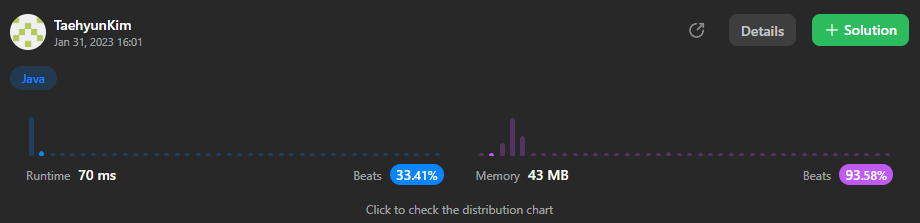

### Easy || 100% || Fully Explained || C++, Java, Python, JavaScript, Python3 || Sliding Window
---

In [4]:
/**
 * Sliding window (In this solution windows of size = p.length() is always
 * maintained.)
 *
 * Time Complexity: O(S + P)
 *
 * Space Complexity: O(P). We only save unique characters in P. It will be O(1)
 * as there are only 26 alphabets.
 *
 * S = Length of input string s. P = Length of input string p.
 */
class WindowSolution {
    public List<Integer> findAnagrams(String s, String p) {
        if (s == null || p == null) {
            throw new IllegalArgumentException("Input string is null");
        }

        List<Integer> result = new ArrayList<>();
        int sLen = s.length();
        int pLen = p.length();
        if (sLen * pLen == 0 || sLen < pLen) {
            return result;
        }

        Map<Character, Integer> map = new HashMap<>();
        for (int i = 0; i < p.length(); i++) {
            map.put(p.charAt(i), map.getOrDefault(p.charAt(i), 0) + 1);
        }

        int toBeMatched = map.size();
        int start = 0;
        int end = 0;

        while (end < sLen) {
            char eChar = s.charAt(end);
            if (map.containsKey(eChar)) {
                int count = map.get(eChar);
                if (count == 1) {
                    toBeMatched--;
                }
                map.put(eChar, count - 1);
            }
            end++;

            if (end - start > pLen) {
                char sChar = s.charAt(start);
                if (map.containsKey(sChar)) {
                    int count = map.get(sChar);
                    if (count == 0) {
                        toBeMatched++;
                    }
                    map.put(sChar, count + 1);
                }
                start++;
            }

            if (toBeMatched == 0) {
                result.add(start);
            }
        }

        return result;
    }
}

In [5]:
WindowSolution windowSolution = new WindowSolution();
String s = "cbaebabacd", p = "abc";

/* Measure execution time */
Instant start = Instant.now();
List<Integer> answer = windowSolution.findAnagrams(s, p);
Instant finish = Instant.now();

answer

[0, 6]

In [6]:
Duration.between(start, finish).toMillis();

49